In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'covid_report.xlsx'
df = pd.read_excel(url, header=0)

df.head()

LOCATION_ID GENDER AGEGRP       DATE  COVID_COUNT COUNTY_NAME
0        18001      F   0-19 2020-06-26            1       Adams
1        18001      F   0-19 2020-07-21            2       Adams
2        18001      F   0-19 2020-07-31            2       Adams
3        18001      F   0-19 2020-08-05            1       Adams
4        18001      F   0-19 2020-08-11            1       Adams

In [4]:
df.index = pd.to_datetime(df['DATE'])
df = df.rename_axis('Date') # Rename the index
df

LOCATION_ID   GENDER AGEGRP       DATE  COVID_COUNT COUNTY_NAME
Date                                                                       
2020-06-26        18001        F   0-19 2020-06-26            1       Adams
2020-07-21        18001        F   0-19 2020-07-21            2       Adams
2020-07-31        18001        F   0-19 2020-07-31            2       Adams
2020-08-05        18001        F   0-19 2020-08-05            1       Adams
2020-08-11        18001        F   0-19 2020-08-11            1       Adams
...                 ...      ...    ...        ...          ...         ...
2020-10-07        18183        M    80+ 2020-10-07            1     Whitley
2020-09-14        18183  Unknown  30-39 2020-09-14            1     Whitley
2020-10-03        18183  Unknown  50-59 2020-10-03            1     Whitley
2020-07-17        18183  Unknown    80+ 2020-07-17            1     Whitley
2020-07-23        18183  Unknown    80+ 2020-07-23            1     Whitley

[59376 rows x 6 columns]

In [5]:
df.describe(include = 'all')

LOCATION_ID GENDER AGEGRP                 DATE   COVID_COUNT  \
count   59376.000000  59376  59376                59376  59376.000000   
unique           NaN      3      9                  214           NaN   
top              NaN      F  20-29  2020-10-07 00:00:00           NaN   
freq             NaN  30312   9442                  598           NaN   
first            NaN    NaN    NaN  2020-03-06 00:00:00           NaN   
last             NaN    NaN    NaN  2020-10-07 00:00:00           NaN   
mean    18085.318546    NaN    NaN                  NaN      2.183997   
std        50.069947    NaN    NaN                  NaN      2.744560   
min     18001.000000    NaN    NaN                  NaN      1.000000   
25%     18043.000000    NaN    NaN                  NaN      1.000000   
50%     18087.000000    NaN    NaN                  NaN      1.000000   
75%     18127.000000    NaN    NaN                  NaN      2.000000   
max     18183.000000    NaN    NaN                  NaN     84.000000   

       COUNTY_NAME  
count        59376  
unique          92  
top         Marion  
freq          3218  
first          NaN  
last           NaN  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

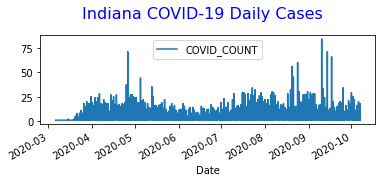

In [6]:
fig = plt.figure()
fig.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16)
ax1 = fig.add_subplot(211)
df.plot(ax=ax1, y='COVID_COUNT') # Note that index is used for x-axis values

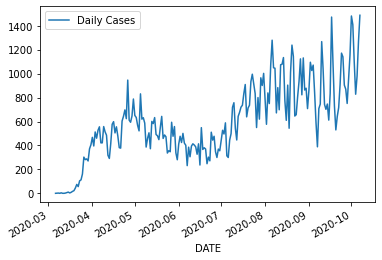

In [7]:
dfg = df.groupby(by=['DATE']).sum()
dfg = dfg.rename(columns={'COVID_COUNT':'Daily Cases'})

dfg

dfg.plot(y='Daily Cases')

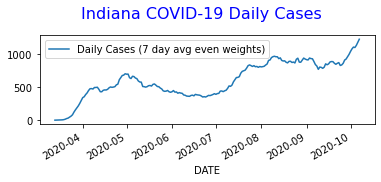

In [8]:
fig1 = plt.figure()
fig1.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16)
ax1 = fig1.add_subplot(211)

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True)

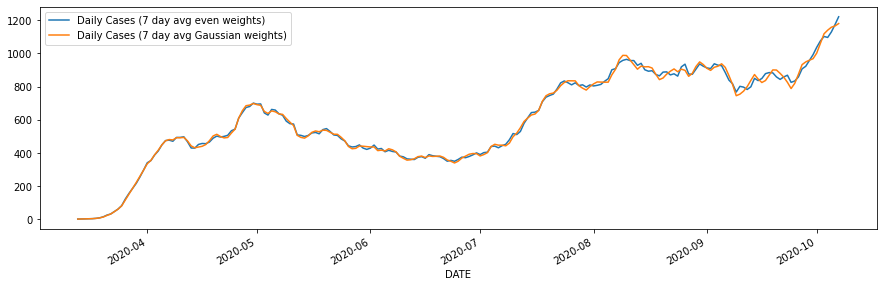

In [9]:
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(211)
#ax2.xaxis.label.set_color('green')
#ax2.yaxis.label.set_color('green')
#ax2.tick_params(colors='green')

# plotting both smoothed curves together

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True, y='Daily Cases')
dfg['Daily Cases'].rename('Daily Cases (7 day avg Gaussian weights)').rolling(7, win_type='gaussian').mean(std=3).plot(ax=ax1,legend=True)